In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

import logging
logging.basicConfig()

from pathlib import Path
from pprint import pprint

from tqdm import tqdm, trange

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import fish

In [2]:
NOTEBOOK_NAME = "petri_dish"

HERE = Path.cwd().absolute()
DATA = HERE.parent / "data"
OUT = HERE / "out" / Path(NOTEBOOK_NAME).stem
print(HERE)
print(DATA)
print(OUT)

D:\projects\fish\dev
D:\projects\fish\data
D:\projects\fish\dev\out\petri_dish


In [3]:
frames = fish.cached_read(DATA / "D1-6.hsv")[100:]
frames.shape

(1717, 1024, 1280)

Calculating background: 100%|██████████| 1717/1717 [00:10<00:00, 169.30it/s]
D:\projects\fish\fish\figs.py:25: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


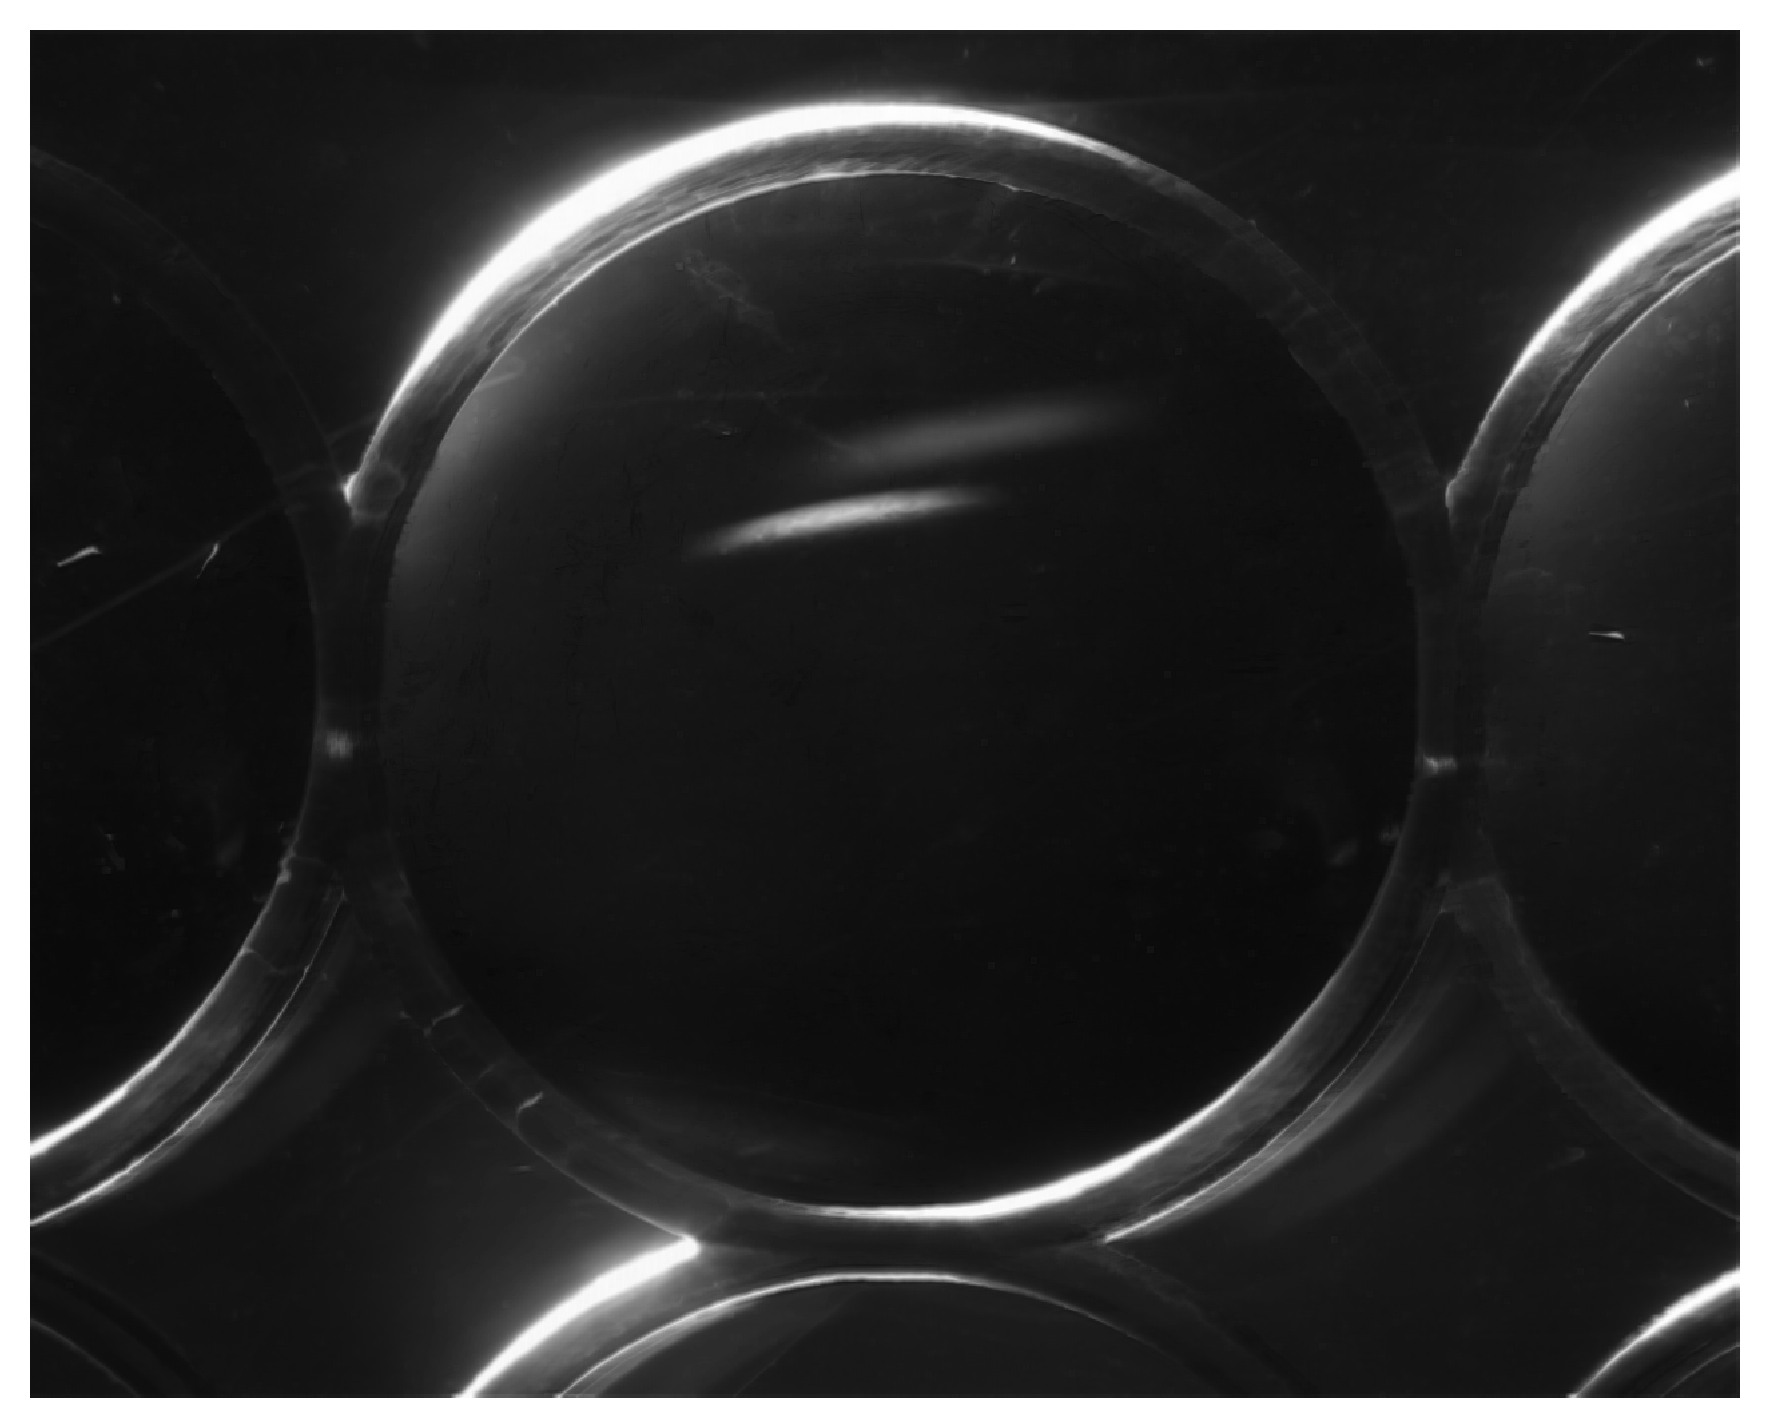

In [4]:
bgnd = fish.background_via_min(frames)
fish.show_frame(bgnd)

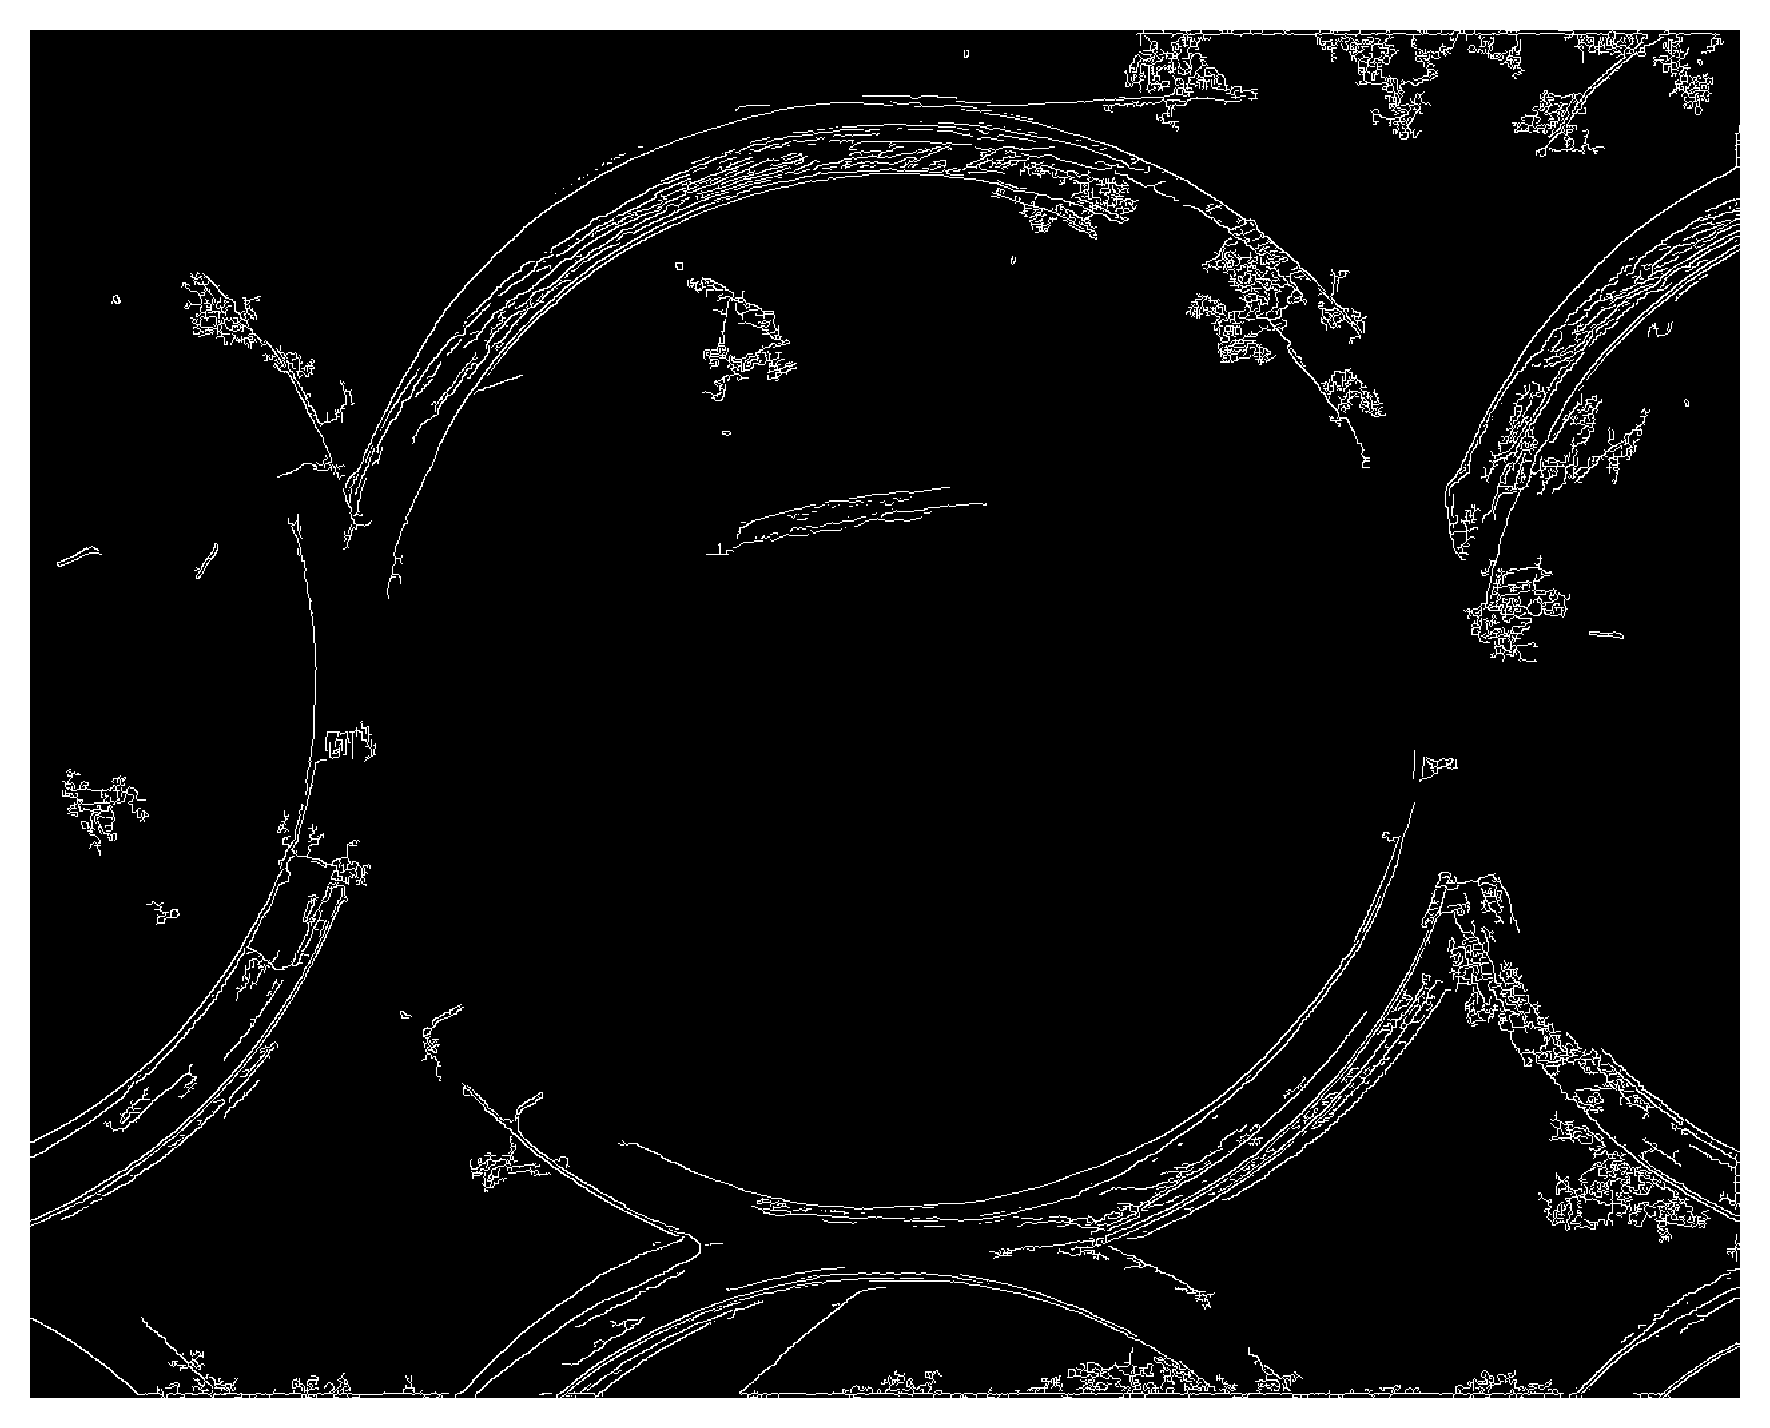

In [5]:
edges = cv.Canny(
    bgnd,
    threshold1 = 1,
    threshold2 = 64,
    apertureSize = 3,
    L2gradient = True,
)
fish.show_frame(edges)

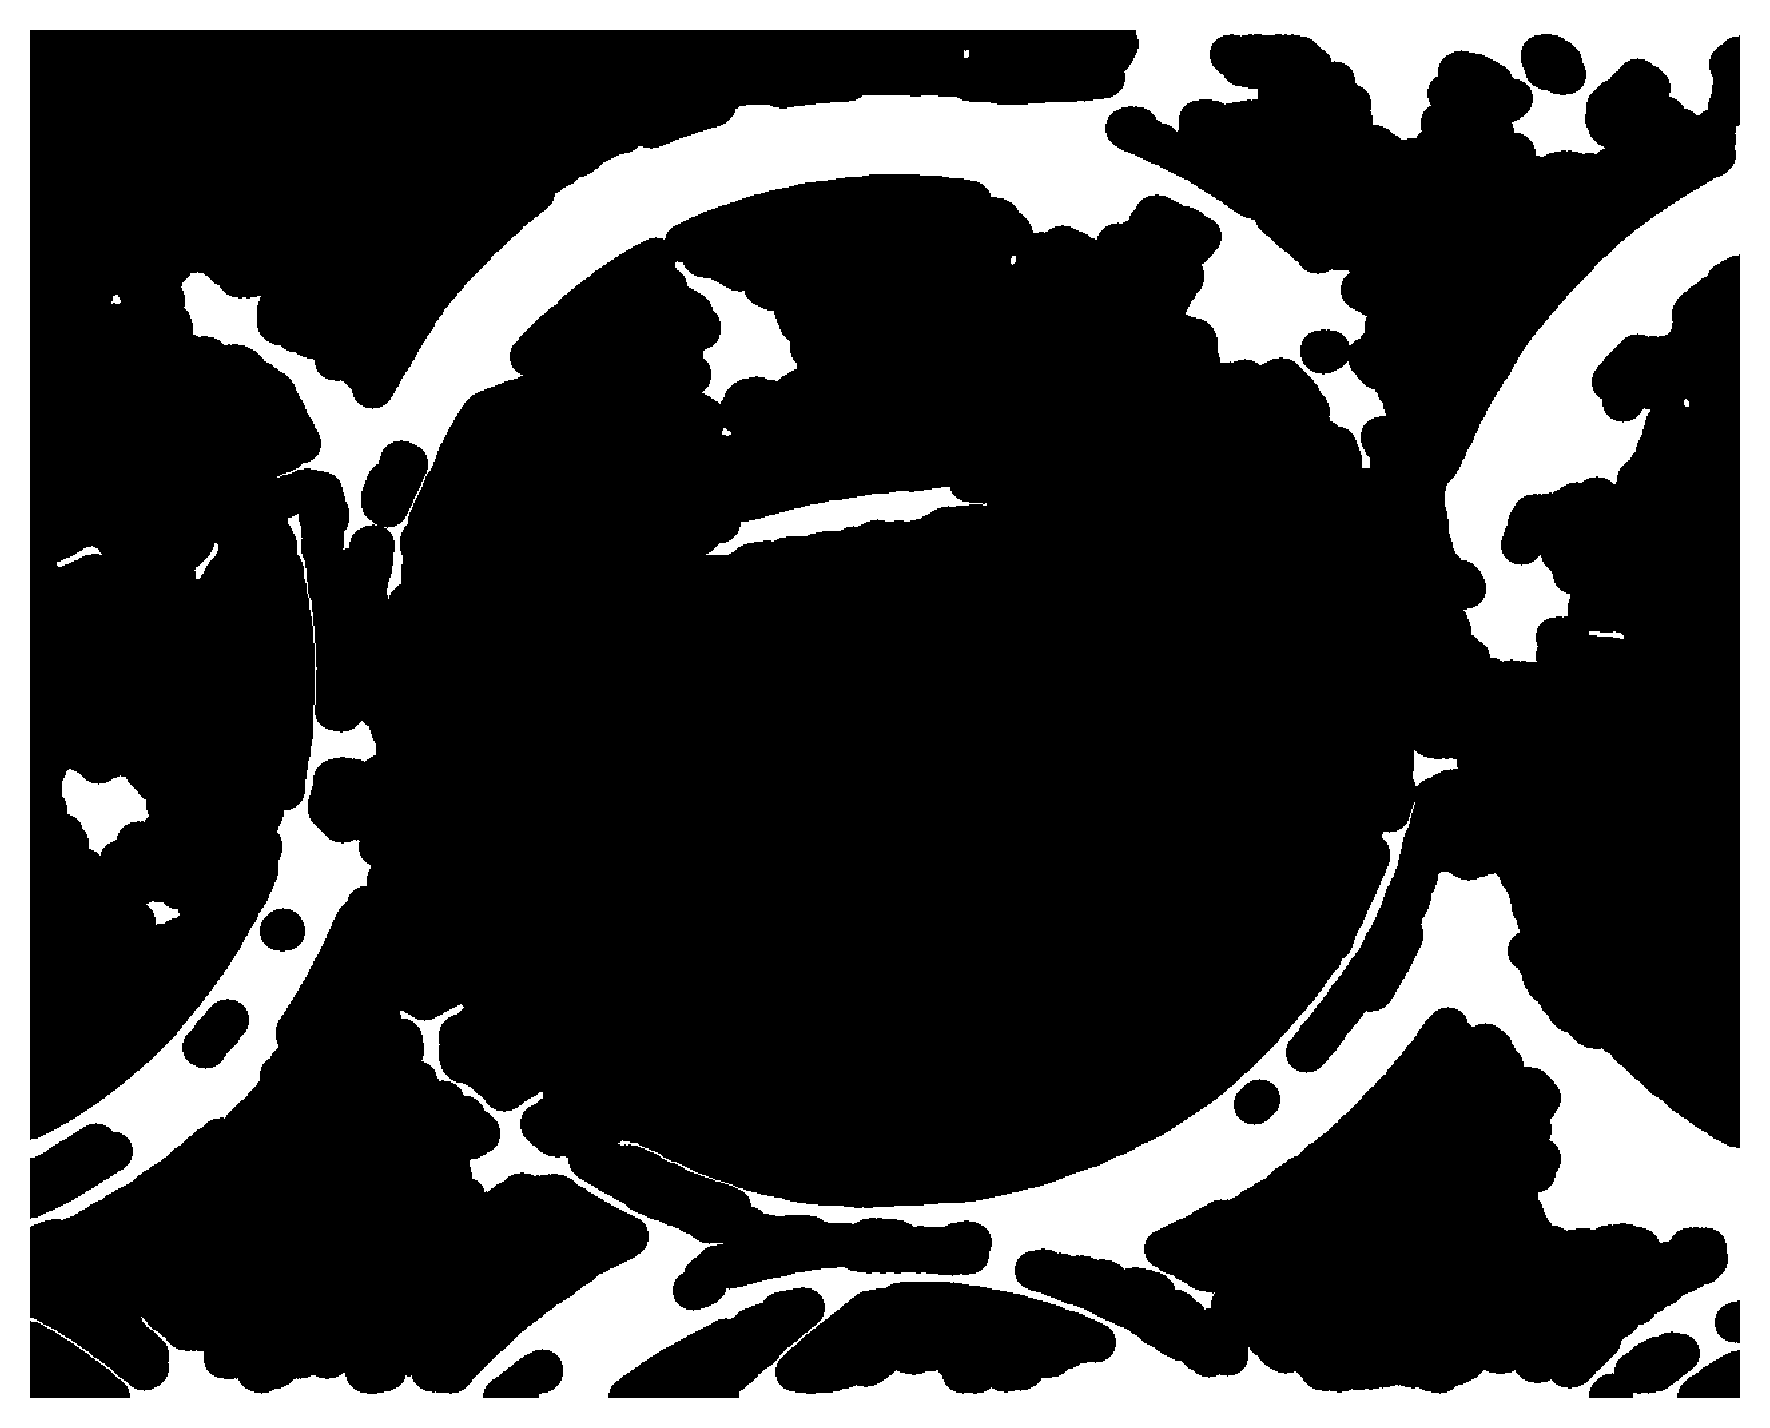

In [6]:
KERNEL_SIZE = 31
CIRCLE_CLOSING_KERNEL = cv.getStructuringElement(cv.MORPH_ELLIPSE, (KERNEL_SIZE, KERNEL_SIZE))
closed = cv.morphologyEx(edges, cv.MORPH_CLOSE, CIRCLE_CLOSING_KERNEL)
fish.show_frame(closed)

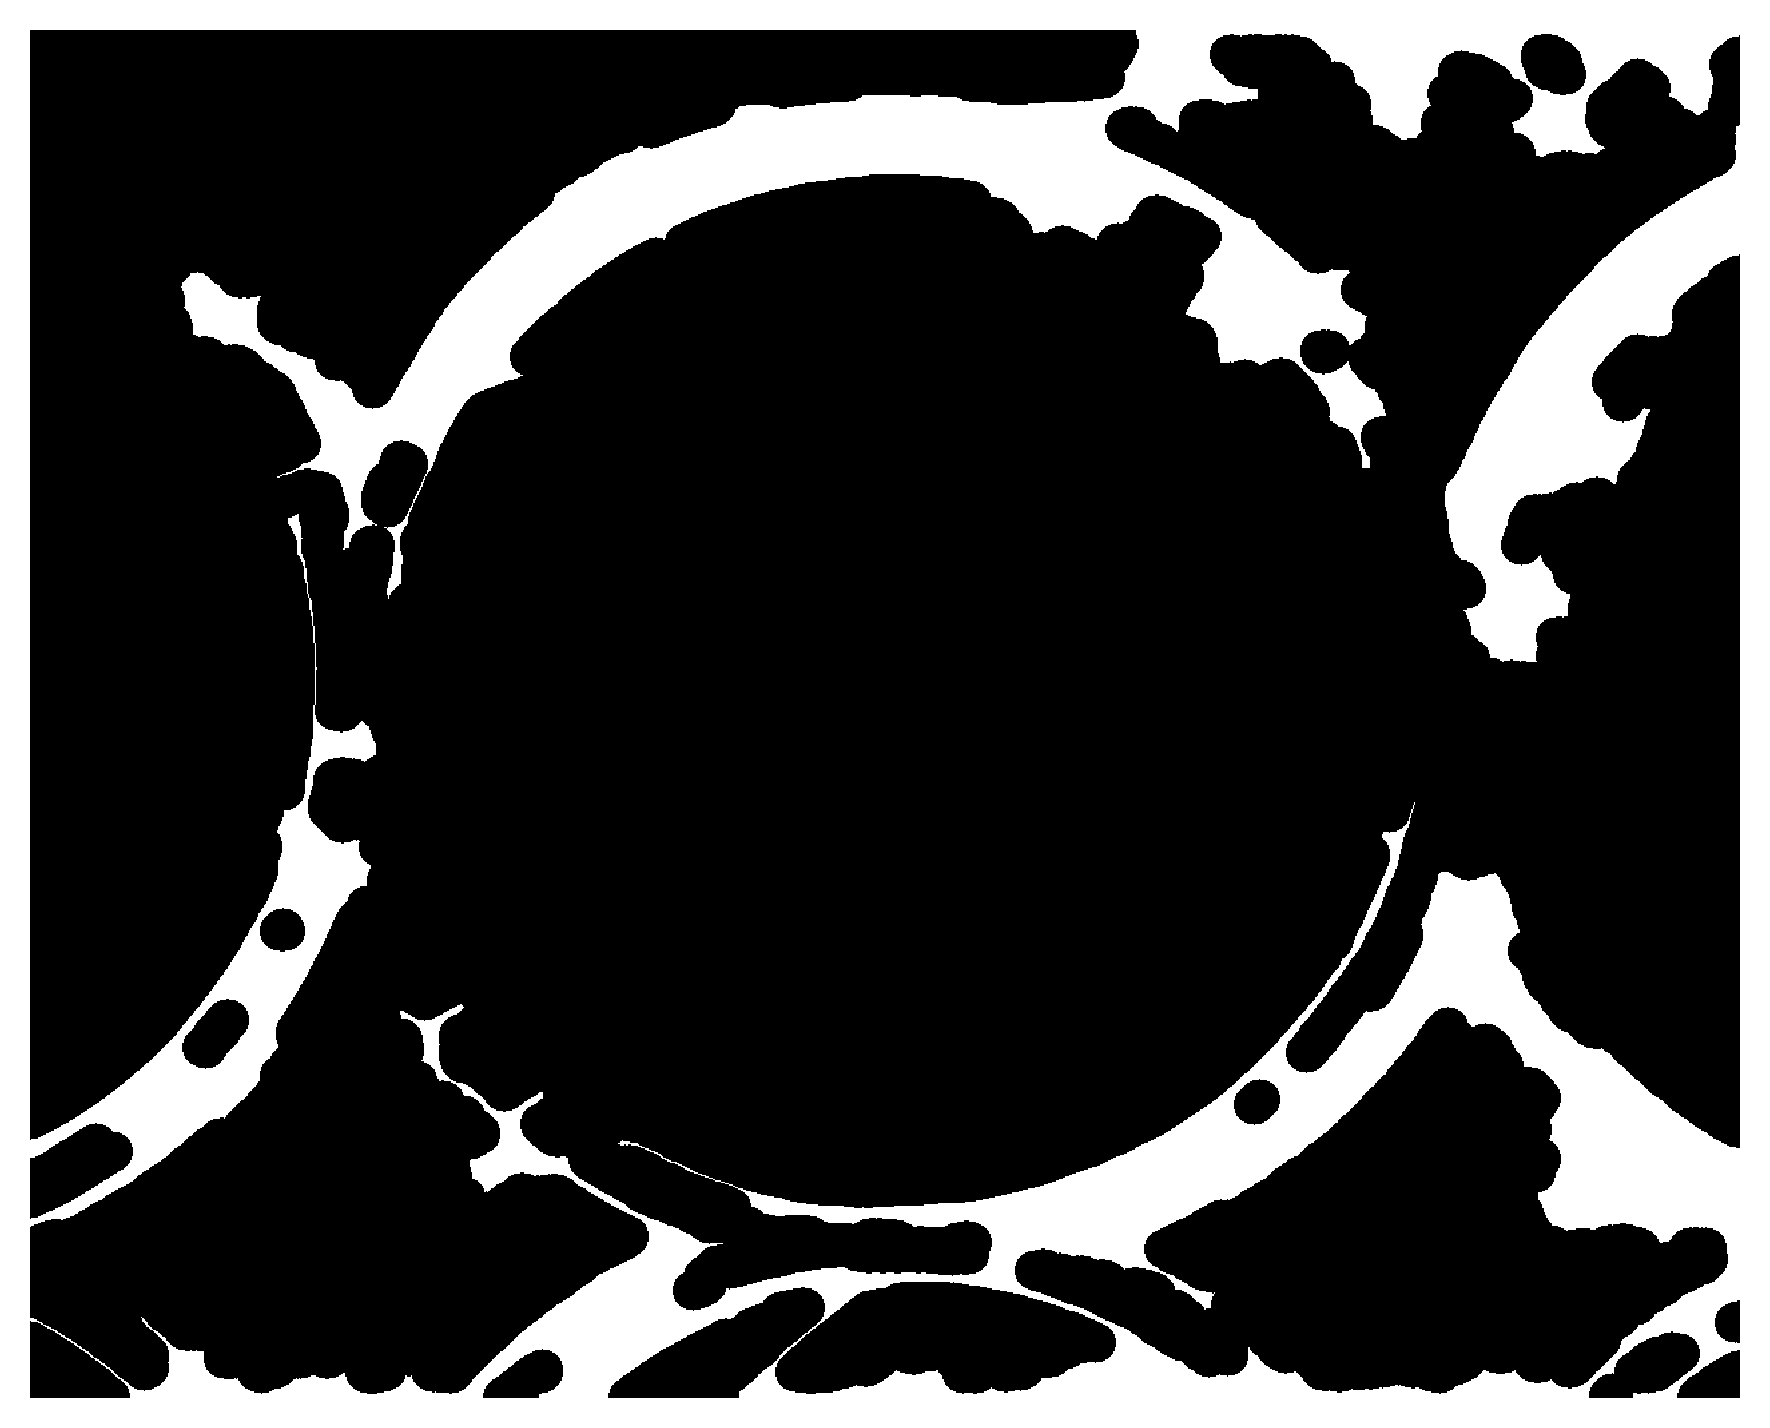

In [7]:
filtered = fish.remove_components_below_cutoff_area(closed, 5000)
fish.show_frame(filtered)

In [9]:
circles = fish.find_circles_via_hough_transform(filtered)
for idx, circle in enumerate(circles[:8]):
    print(idx, fish.area_ratio(circle, filtered))

0 0.09401082073282478
1 0.012373455295113342
2 0.09634471375202151
3 0.01839333063556434
4 0.02023778032395422
5 0.010890236676520131
6 0.009585871159673204
7 0.009028279812966116


D:\projects\fish\fish\figs.py:25: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


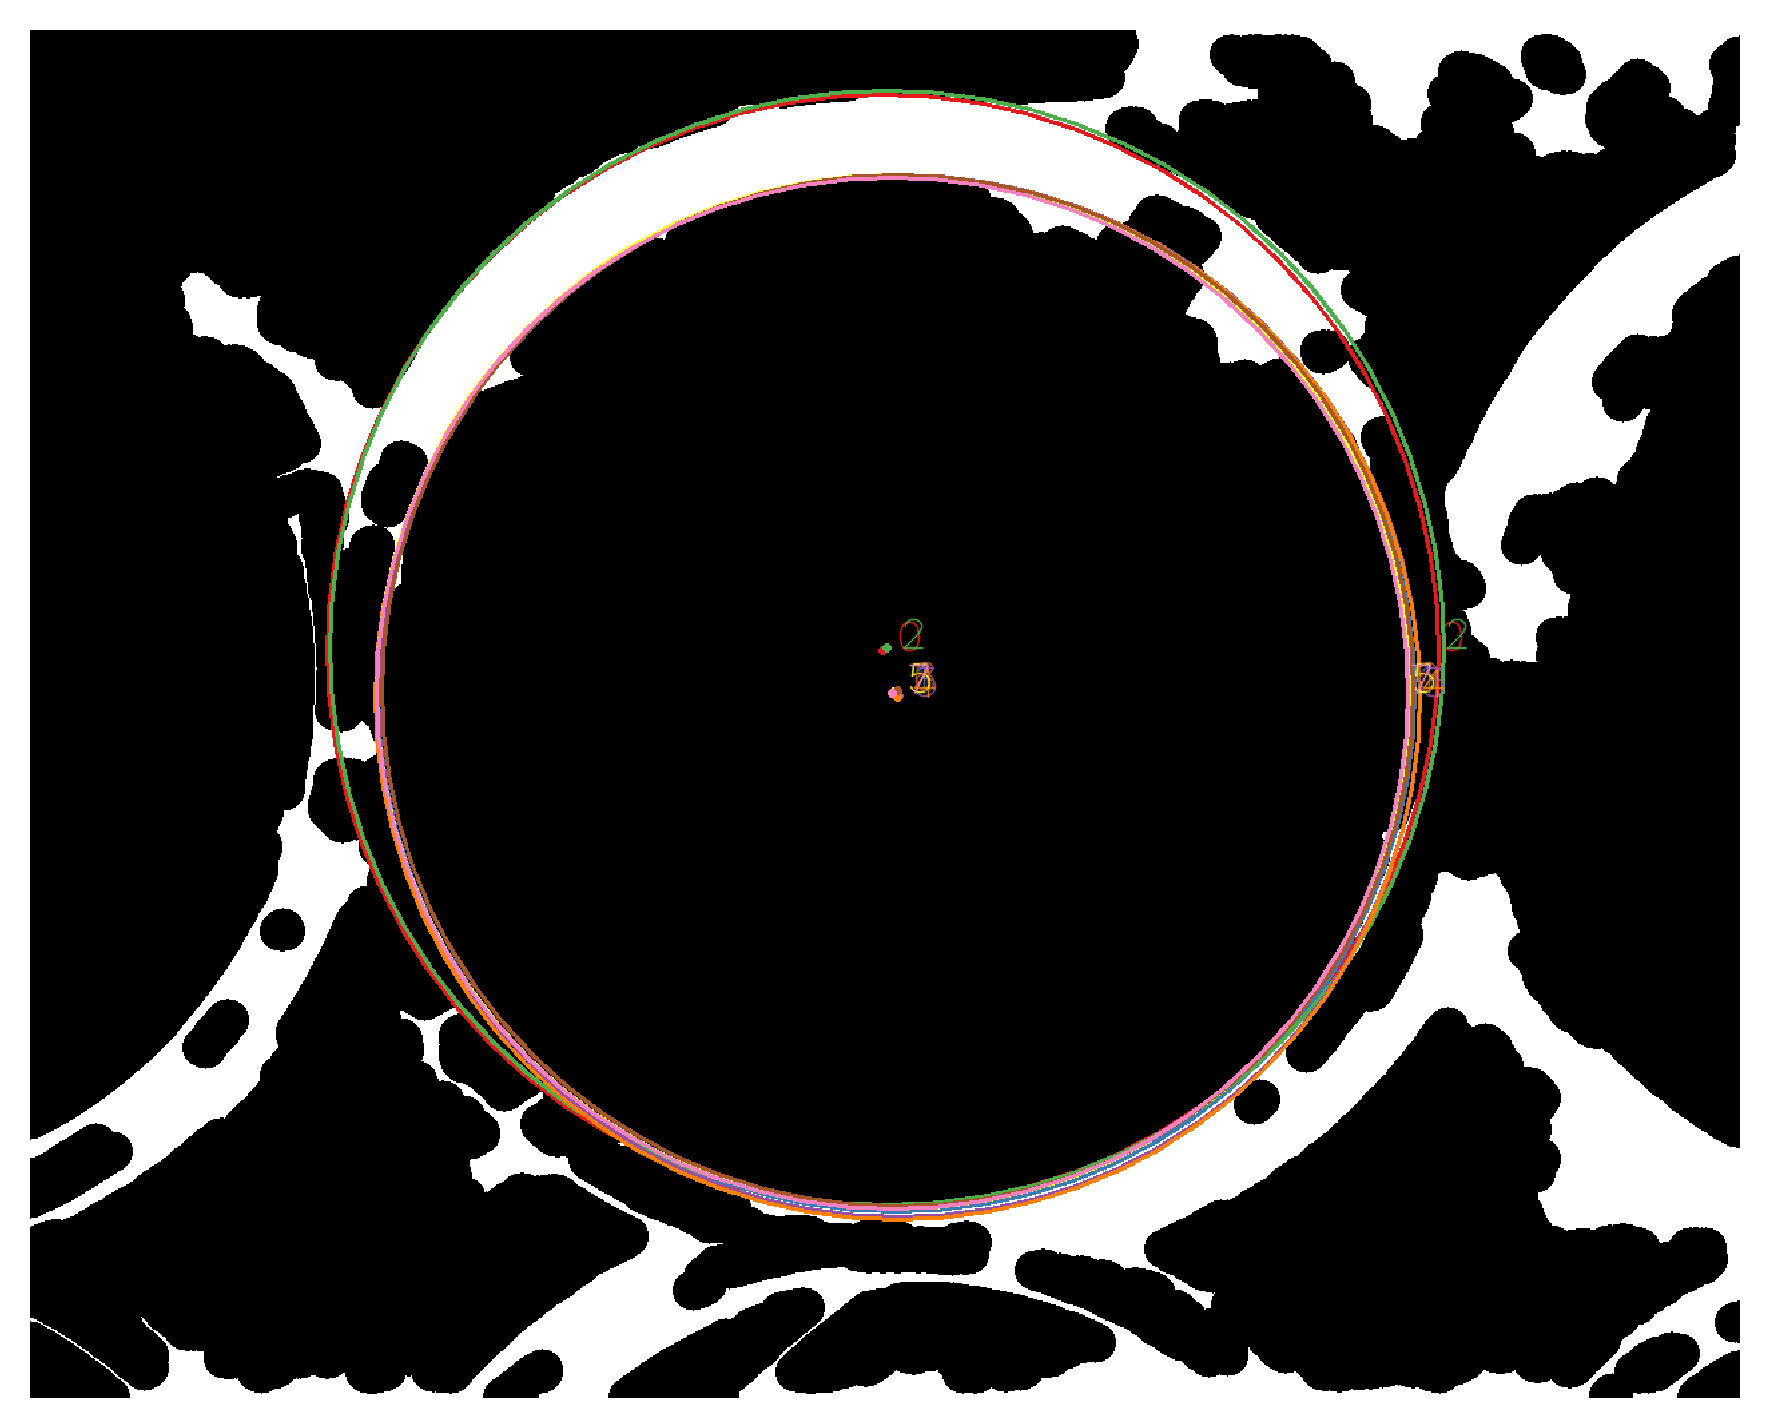

In [10]:
circled = fish.draw_circles(filtered, circles[:8], mark_centers = True, label = True)
fish.show_frame(fish.bgr_to_rgb(circled))

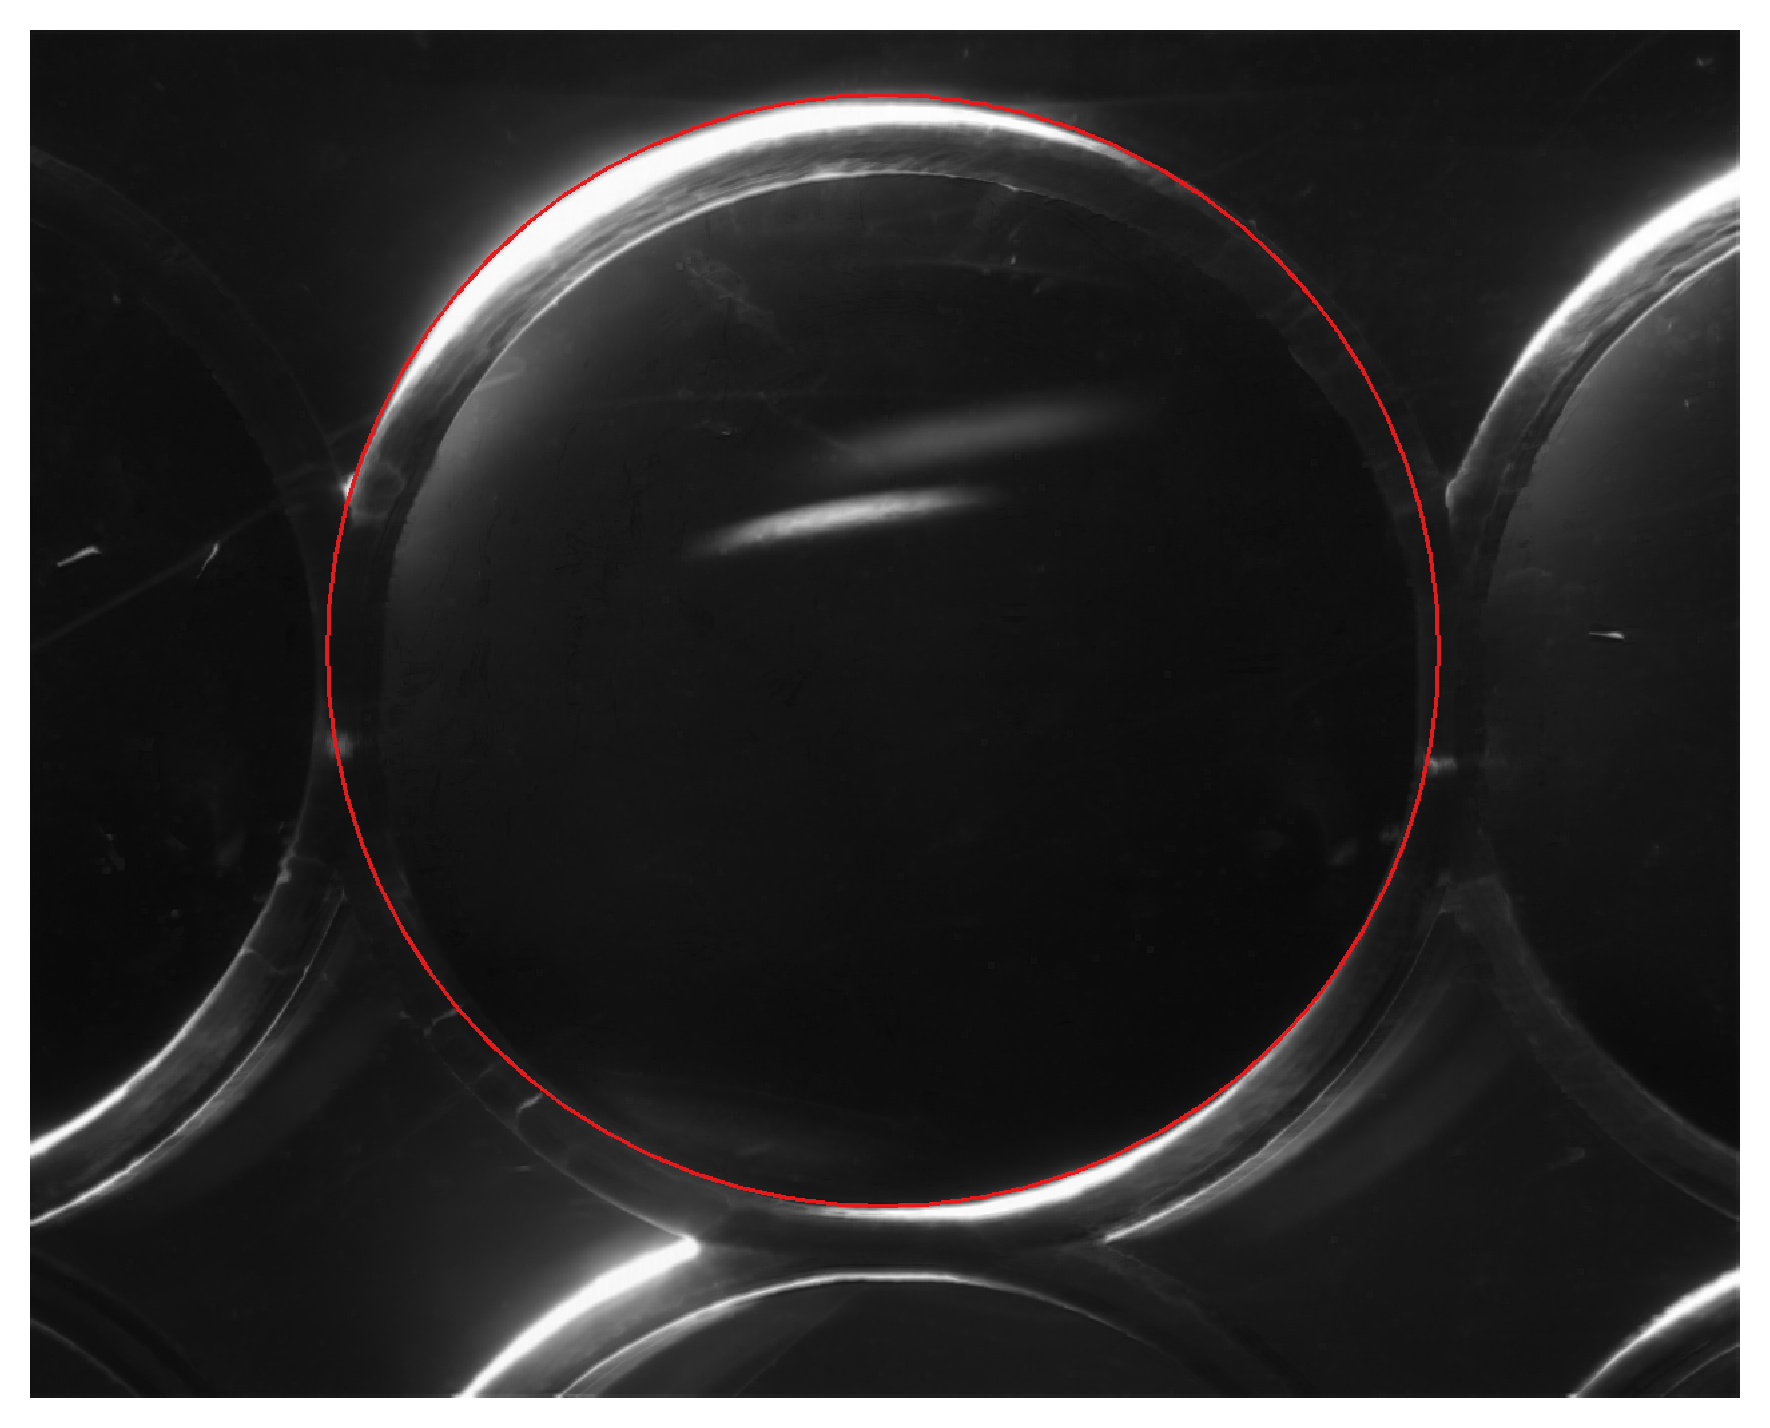

In [11]:

dish = fish.decide_dish(circles)
dished = fish.draw_circles(bgnd, [dish])
fish.show_frame(fish.bgr_to_rgb(dished))